# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are total 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
1. Order_id, Customer_id, food_preparation_time, delivery_time are integers.
2. restaurant_name, cuisine_type, day_of_the_week, rating are object.
3. cost_of_the_order is float.
4. There are not any missing values in the data.

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df.cuisine_type = df.cuisine_type.astype('category')
df.restaurant_name = df.restaurant_name.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations: The memory usage was 133.6+ KB includes columns which had object . Converting columns from object type to catagory type reduced the memory usage and total memory usage is 102.7 + KB. After conversion there are total 3 catagory columns 



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [9]:
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations from number variables:
1. Time to prepare the food once the order is placed  is between 20.00 mins and  is 35.41 mins.
2. There is no skewness observed in the data. 
3. Minimum cost of the order is 4.47 and maximum is 35.41 dollars. 

#### Observations from non- number variables:
1. There are total 178 resturants and top resturant is shake shack
2. People like to order American Cusine type often 
3. More order are placed on weekend as compare to weekdays. 
4. 736 orders do not have any rating. 

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
df1 = df['rating']
df1

0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object

In [11]:
df1.value_counts('rating')

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [12]:
df1.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 736 orders out of 1898 orders are not rated by customers


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
        
    )  # Add median to the histogram
        
        

In [14]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

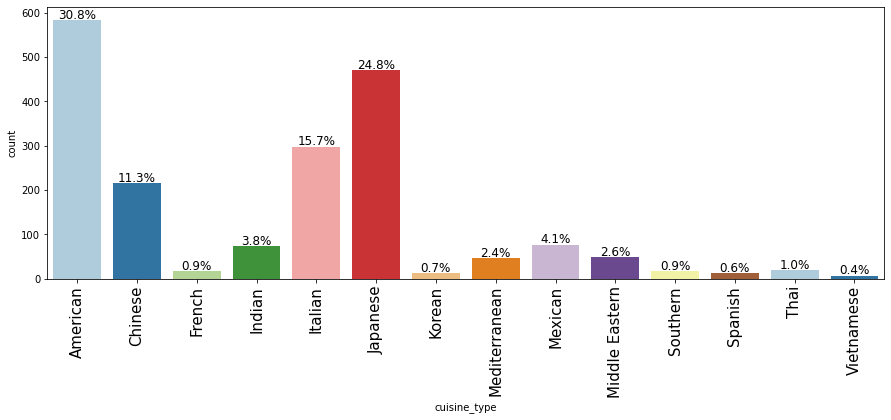

In [15]:
labeled_barplot(df, 'cuisine_type', perc=True)

#### Observation: 
1. American cusine is most ordered followed by Japanese, Italian & Chinese

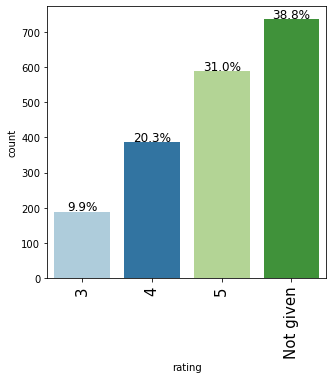

In [16]:
labeled_barplot(df, 'rating', perc=True)

#### Observations: 
1. 38% rating isn't given, 31% resturant rated 5. 

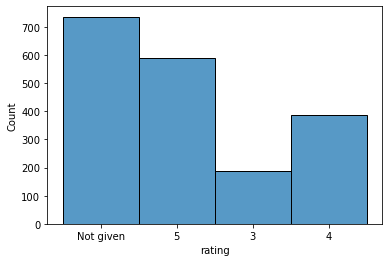

In [17]:
sns.histplot(data=df, x="rating");

#### Observation : 
1. Most of the orders didn't receive any rating. 
2. More than 500 orders have rating of 5. 
3. 200 orders have rating of 3.
4. 400 orders have rating of 4. 

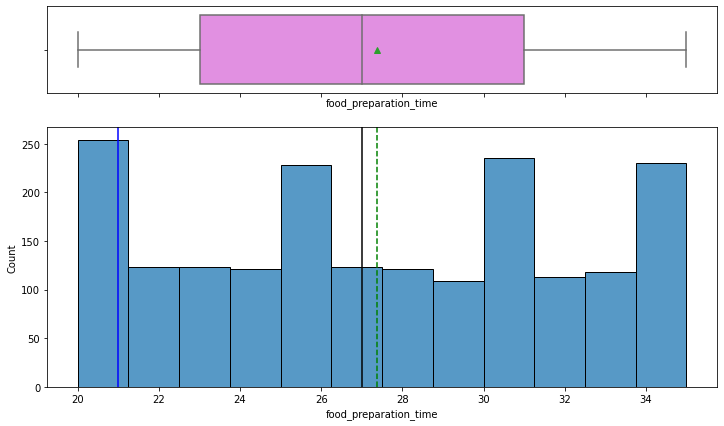

In [18]:
histogram_boxplot(df,'food_preparation_time')
plt.axvline(df['food_preparation_time'].mode()[0], color="blue")

#### observation: 
1. Once the order is placed, most of the orders are prepared in 21 mins. 
2. Average time to prepare order is 27 mins. 
3. There isn't any skewness in the data.

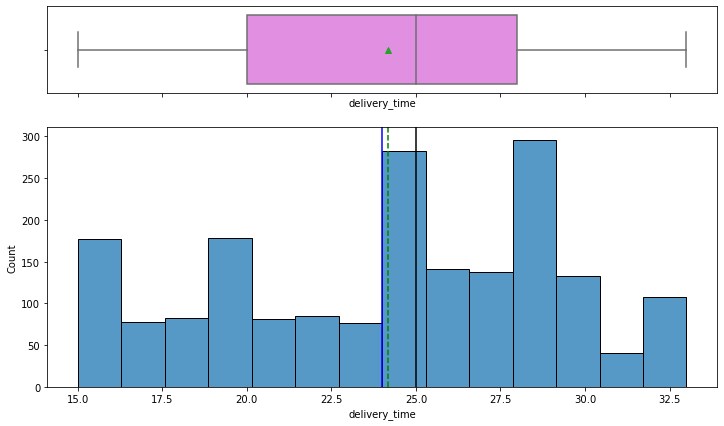

In [19]:
histogram_boxplot(df,'delivery_time');
plt.axvline(df['delivery_time'].mode()[0], color="blue")

#### Observation : 
1. Average delivery time is 27 mins once order is ready to be picked up. There are no outliers in the food delivery. 
2. Minimum delivery time is 15 mins and maximum is 33 mins. 

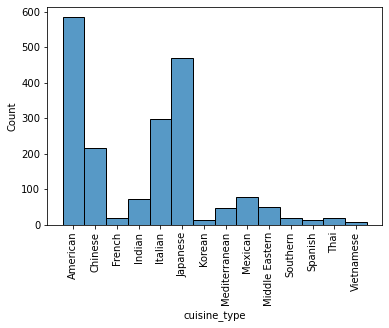

In [20]:
sns.histplot(data=df, x="cuisine_type");
plt.xticks(rotation=90);

#### Observations:
1. American cusine is most ordered followed by Japanese, Italian and Chinese. 
2. Vetnamese cusine is least ordered by customers.

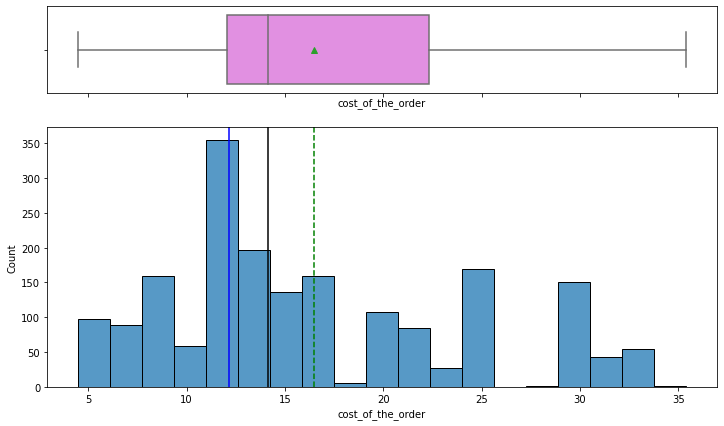

In [21]:
histogram_boxplot(df,'cost_of_the_order');
plt.axvline(df['cost_of_the_order'].mode()[0], color="blue");

#### Observation : 
1. Most of the order cost was around 12 dollars.
2. Minimum order cost is less than 5 dollars
3. Maximum order cost is little more than 35 dollars.
4. Basically cost of the order is between approximately 4 dollars to 36 dollars.

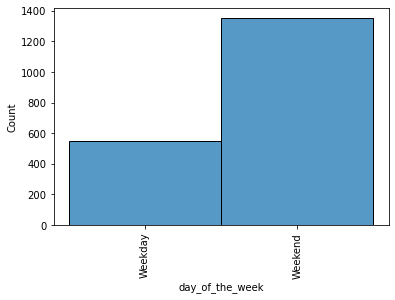

In [22]:
sns.histplot(df, x="day_of_the_week");
plt.xticks(rotation=90);

#### Observation :
1. Most of the orders are placed on weekend. 
2. More than 1300 orders are placed on weekend.
3. More than 500 orders are placed on weekdays. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
df['restaurant_name'].value_counts().sort_values(ascending = False).head(5).reset_index()

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations :
1. Shake shack, The Meatball Shop, Blue Riboon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants which recived most 
number of orders. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
df[df['day_of_the_week']== 'Weekend']['cuisine_type'].value_counts().reset_index()

,index,cuisine_type
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


#### Observations:
American cusine is most popular compared to other cusine type during weekend orders. 


In [25]:
df[df['day_of_the_week']== 'Weekday']['cuisine_type'].value_counts().reset_index()

,index,cuisine_type
0,American,169
1,Japanese,135
2,Italian,91
3,Chinese,52
4,Indian,24
5,Mexican,24
6,Middle Eastern,17
7,Mediterranean,14
8,Southern,6
9,French,5


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
df3 = df.loc[(df['cost_of_the_order'] > 20)]['cost_of_the_order']
df4 = df3.count()
print(df4)
percentage_of_order=((df[df['cost_of_the_order']>20]['order_id'].count())/(df['order_id'].count()))*100
print("{:.2f}%".format(percentage_of_order))

555
29.24%


#### Observations:
 1. Total there were 555 orders which were more than 20 dollars.
 2. Percentage of order which has more than 20 dollars value is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
Average_delivery_time = df['delivery_time'].mean()
print('The Average or mean delivery time of the order is ' '{:.2f}'.format(Average_delivery_time))

The Average or mean delivery time of the order is 24.16


#### Observations:
The Average or mean delivery time of the order is 24.16.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
top_5_customers = df['customer_id'].value_counts().sort_values(ascending = False).head(5).reset_index()
top_5_customers
print ('These are the top 5 frequent customers who will receive 20% discount vouchers for future orders',top_5_customers)

These are the top 5 frequent customers who will receive 20% discount vouchers for future orders     index  customer_id
0   52832           13
1   47440           10
2   83287            9
3  250494            8
4  259341            7


#### Observations:
1. Customer 52832, 47440, 83287, 250494, 250494, 259341 are the top 5 who ordered frequently, hence they will receive 20% discount on future orders. 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


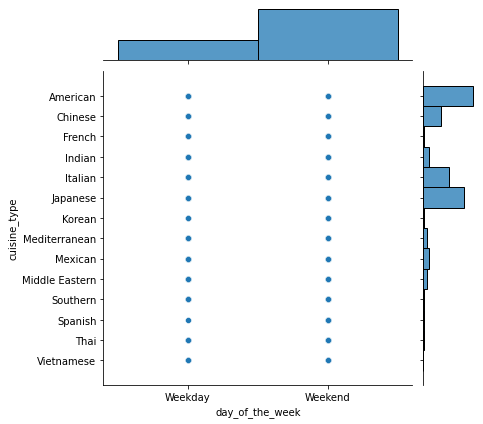

In [29]:
sns.jointplot(data = df, x = 'day_of_the_week', y = 'cuisine_type');

#### Observation: 
1. Ordered received on Weekend is more compared to Weekday. 
2. American cusine is most ordered followed by Japanese , Italian and Chinese.
3. Weekends resturant received more orders as compare to weekdays.
4. Most of the orders received for American cusine type, followed by Japnese, Italian, Chinese and Indian.

## Bivariate relationship

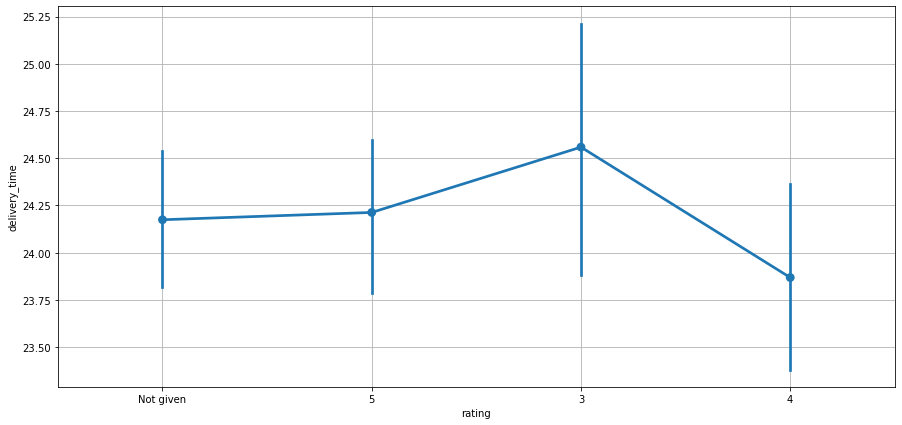

In [30]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.grid ()
plt.show()

#### Observation: 
1. There is decresase in rating when delivery time is more.

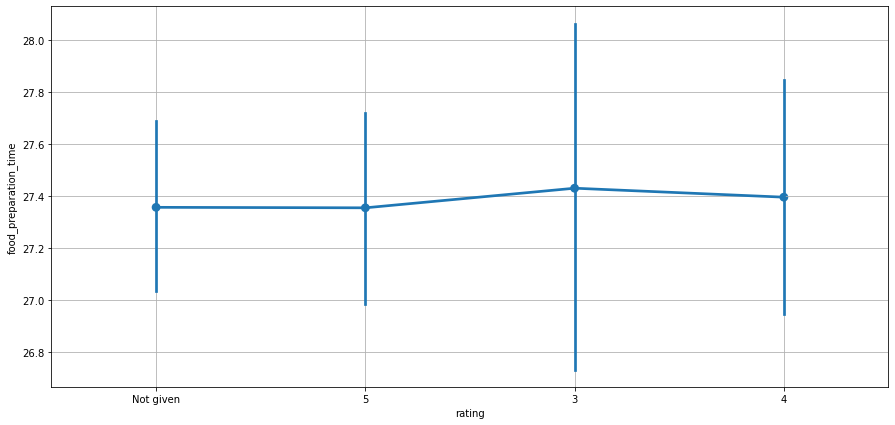

In [31]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df,x='rating',y= 'food_preparation_time')
plt.grid ()
plt.show()

#### Observation:
1. There isn't much difference in rating because of time differences in food prepration. 

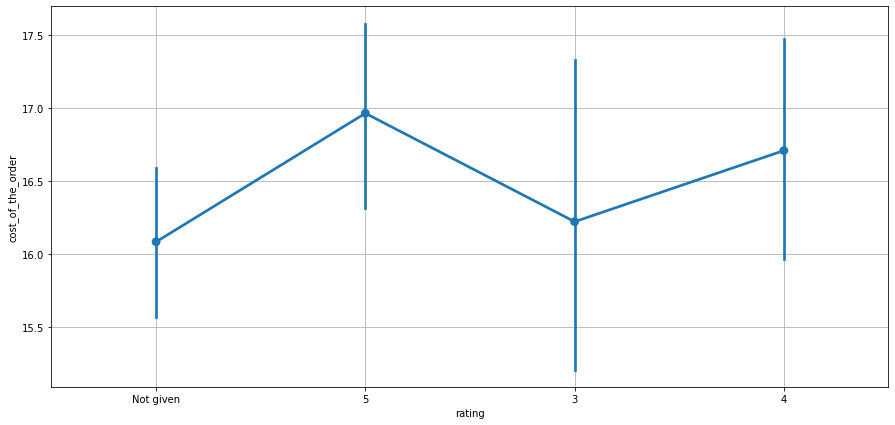

In [32]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data = df,x='rating',y= 'cost_of_the_order') 
plt.grid ()
plt.show()

#### Observation:
- The highly rated orders are high in cost than other orders.

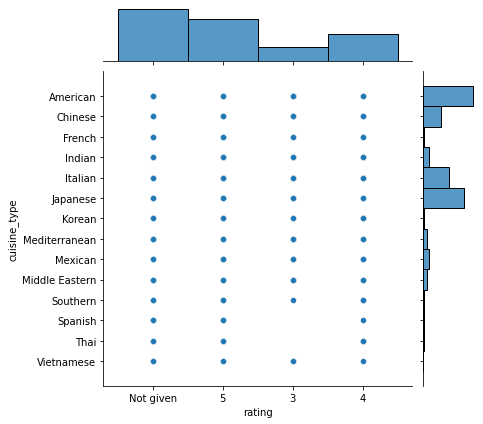

In [33]:
sns.jointplot(data = df, x = 'rating', y = 'cuisine_type');

#### Observation: 
1. Large number of orders didn't receive any rating. 
2. Most of the ratings assigned to orders are 5 followed by 4 and 3. 
3. American cusine type received highest rating followed by Japnese, Italian, Chinese and Indian cusine type.

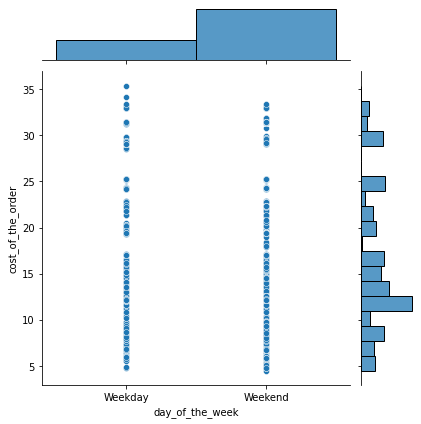

In [34]:
sns.jointplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order');

#### Observation:
1. Most of the orders were placed on weekend. 
2. Frequently order placed cost between 10 to 15 dollars. 

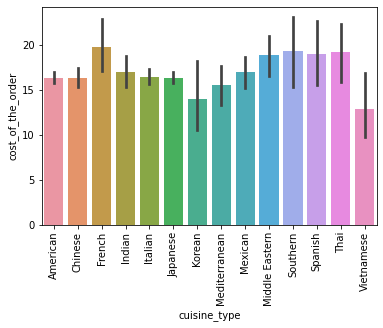

In [35]:
sns.barplot(data=df,x="cuisine_type", y="cost_of_the_order");
plt.xticks(rotation=90);

#### Observation:
1. French cusine type is most expensive. 
2. Veitnamese cusine is the cheapest, followed by korean cusine type. 
3. From the above graph we can say that American and Chinese cusine type has the average cost. 

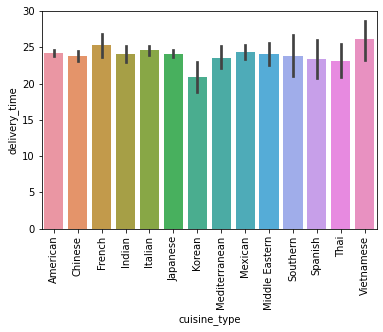

In [36]:
sns.barplot(data=df,x="cuisine_type", y="delivery_time");
plt.xticks(rotation=90);

#### Observations: 
1. Delivery time of Vietnamese cuisine and French cuisine are longer than other cuisine. 

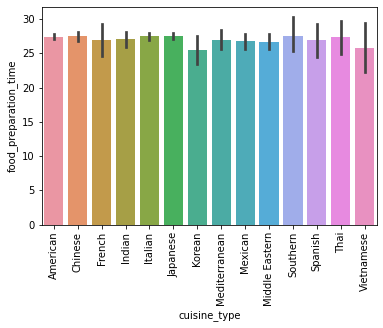

In [37]:
sns.barplot(data=df,x="cuisine_type", y="food_preparation_time");
plt.xticks(rotation=90);

#### Obsevation: 
1. Food preparation time of most of the cuisine is between 25 to 28 miniutes. 

In [38]:
z = df['delivery_time'] + df['food_preparation_time']

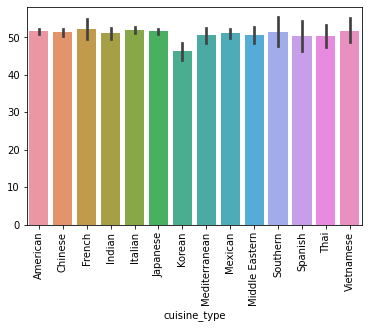

In [39]:
# z = total time taken (delivery_time + food_preparation_time)
sns.barplot(data=df,x="cuisine_type", y=z);
plt.xticks(rotation=90);

#### Obsevations : 
1. This graph will give the clear picture of total time taken to prepare the food and deliver.
2. Once the order is placed total time for most of the cuisine is little over 50 mins except Korean cuisine, which is around 45 minutes

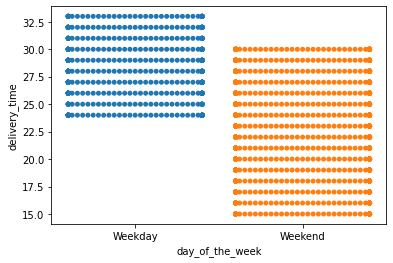

In [40]:
sns.swarmplot(data = df, x='day_of_the_week', y ='delivery_time');

#### Observations :
1. Delivery time on weekday takes longer time compare to weekend

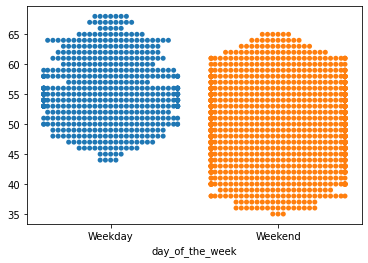

In [41]:
# z is the total time taken that is food_preparation_time plus delivery_time
sns.swarmplot(data = df, x='day_of_the_week', y = z);

#### Observations : 
1. Here z is the total time taken (i.e. time to food preparation and delivery)
2. We clearly see that cumilitively total time taken on weekdays is longer than weekend. 

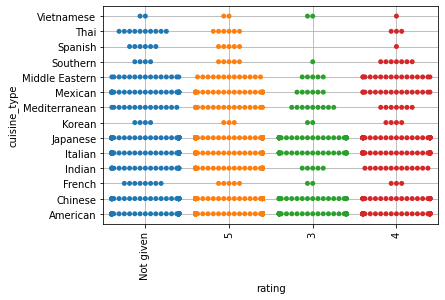

In [42]:
sns.swarmplot(data = df, x='rating', y = 'cuisine_type');
plt.grid ()
plt.xticks(rotation=90);

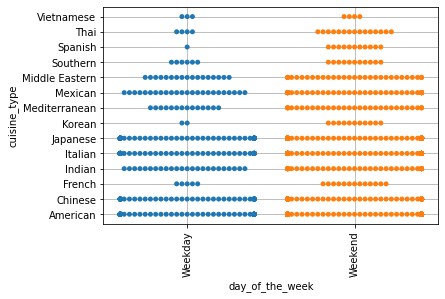

In [43]:
sns.swarmplot(data = df, x='day_of_the_week', y = 'cuisine_type');
plt.grid ()
plt.xticks(rotation=90);

#### Observations:
1. Order received for Spanish, Korean and Vietnamese cuisine is less on weekday compare to weekend. 
2. In general order received on weekend is more than weekday.

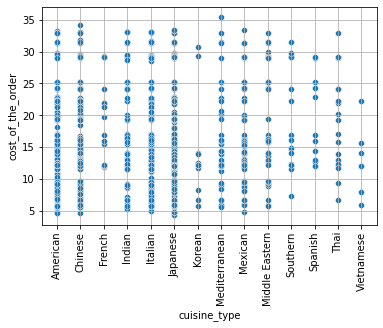

In [44]:
sns.scatterplot(data=df,y="cost_of_the_order",x="cuisine_type");
plt.grid ()
plt.xticks(rotation=90);

#### Observation : 
1. The scatter plot shows that the cost of American and Chinese cuisine is between 5 and 35 dollars.
2. Mediterranean cuisine cost little over 35 dollars. 
3. French cuisine cost between 10 and 30 dollars. 

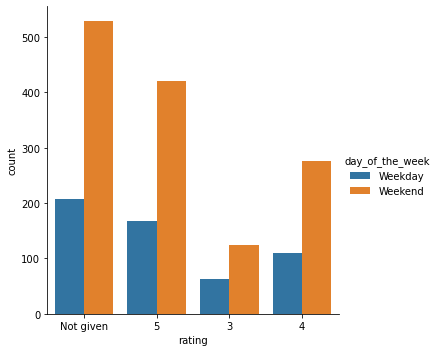

In [45]:
sns.catplot(x="rating",
               hue="day_of_the_week", 
               data=df, 
               kind="count");

#### Observation: 
1. Most of the rating received on weekends compared to weekdays. 

## Multi variate Relationship

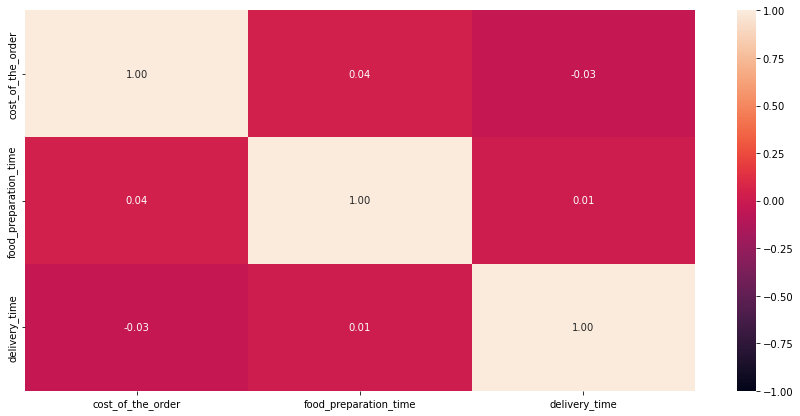

In [46]:
num_var = ['cost_of_the_order','rating','food_preparation_time', 'delivery_time']
corr = df[num_var].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

#### Observations: 
1. Delivery time and cost of the order have ver less negative correlation. 
2. Food preparation time and cost of order have very less positive correlation.
3. Food preparation time and delivery time have very less positive correlation as well.

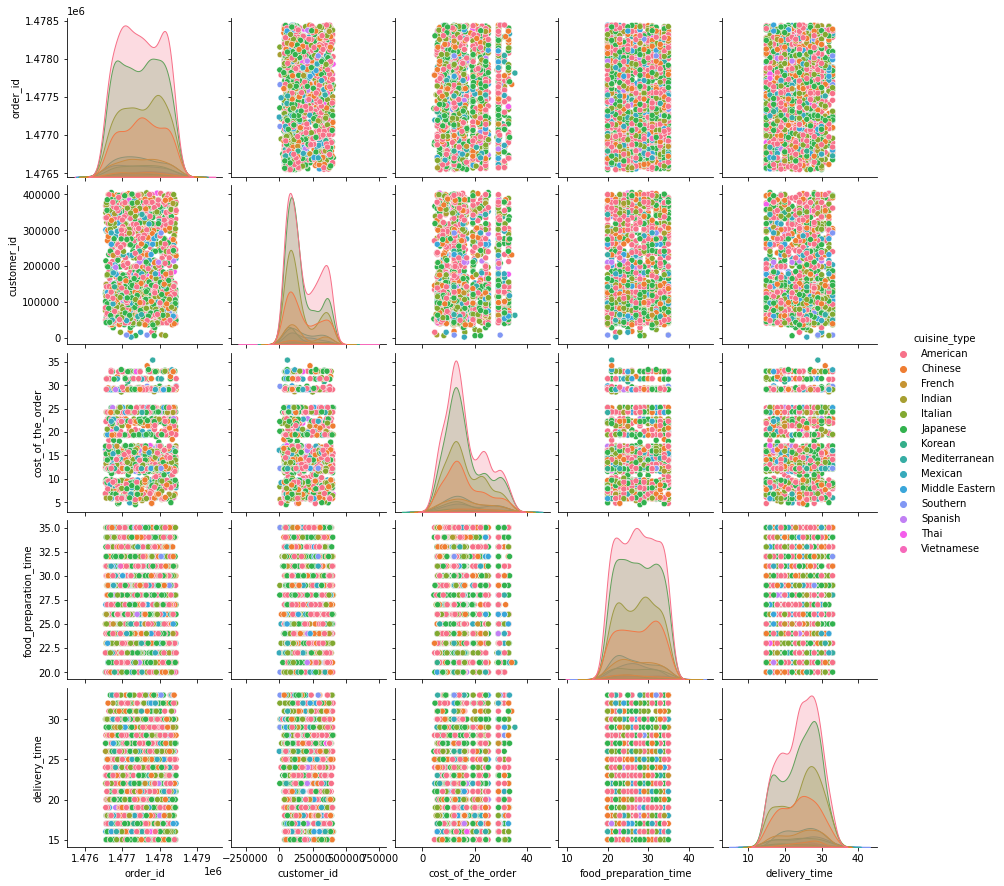

In [47]:
sns.pairplot(df, hue="cuisine_type");

#### Observations: 
1. There are no linear relationship between the columns. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [48]:
restaurant_name_count = df.groupby(['restaurant_name'])['rating'].count().reset_index()
restaurant_name_count
restaurant_count_greater_50 = restaurant_name_count[restaurant_name_count['rating']>50]['restaurant_name']
restaurant_count_greater_50

20     Blue Ribbon Fried Chicken
21             Blue Ribbon Sushi
109                         Parm
121             RedFarm Broadway
122               RedFarm Hudson
136                  Shake Shack
153            The Meatball Shop
Name: restaurant_name, dtype: category
Categories (178, object): [''wichcraft', '12 Chairs', '5 Napkin Burger', '67 Burger', ..., 'brgr', 'da Umberto', 'ilili Restaurant', 'indikitch']

In [49]:
resturant_name_count_average = restaurant_name_count.groupby(['restaurant_name'])['rating'].mean().reset_index()
resturant_avg_rating_4= resturant_name_count_average[resturant_name_count_average['rating']>4]

In [50]:
resturant_avg_rating_4[resturant_avg_rating_4['restaurant_name'].isin(restaurant_count_greater_50)].sort_values(by='rating',ascending = False).reset_index()

,index,restaurant_name,rating
0,136,Shake Shack,219.0
1,153,The Meatball Shop,132.0
2,21,Blue Ribbon Sushi,119.0
3,20,Blue Ribbon Fried Chicken,96.0
4,109,Parm,68.0
5,121,RedFarm Broadway,59.0
6,122,RedFarm Hudson,55.0


#### Observations:
Restuarant that are eligible for promotional offer in the advertisement of the resturants are as follows, 
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm
6. RedFarm Broadway
7. RedFarm Hudson
- These above listed resturants have rating count of 50 and their average rating are greater than 4. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
order_cost_greater_than_20 = df3.sum()
print('Total cost of the order greater than 20 dollars is :',order_cost_greater_than_20)
revenue_25_precent = order_cost_greater_than_20*0.25
print("25 % Revenue generated by the company for orders more than 20 dollars :", revenue_25_precent)

Total cost of the order greater than 20 dollars is : 14754.91
25 % Revenue generated by the company for orders more than 20 dollars : 3688.7275


In [52]:
df5 = df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order']
order_cost_greater_than_5 = df5.sum()
print('Total cost of the order greater than 5 & less than & equal to 20 dollars is :','{:.2f}'.format(order_cost_greater_than_5))
revenue_15_precent = order_cost_greater_than_5*0.15
print("15 % Revenue generated by the company for orders more than 5 dollars and less than and equal to 20 :", '{:.2f}'.format(revenue_15_precent))

Total cost of the order greater than 5 & less than & equal to 20 dollars is : 16517.17
15 % Revenue generated by the company for orders more than 5 dollars and less than and equal to 20 : 2477.58


In [53]:
print("Net revenue generated by the company:", "{:.2f}$".format(revenue_25_precent+revenue_15_precent))

Net revenue generated by the company: 6166.30$


#### Observations:
1. Total net revenue for the orders greater than 20 dollars generated by the company is 6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [54]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time'].copy()
delivery_greater_than_60 = df.loc[(df['total_time'] > 60)]['total_time']
delivery_longer_than_60 = delivery_greater_than_60.count()
print("Total no of orders have more than 60 mins of total delivery time is",delivery_longer_than_60)
total_order = df['total_time'].count()
print("Total no of orders is",total_order)
percentage_order = (delivery_longer_than_60/total_order)*100
print('Percentage of orders take more than 60 minutes to get delivered from the time the order is','{:.2f}%'.format(percentage_order))


Total no of orders have more than 60 mins of total delivery time is 200
Total no of orders is 1898
Percentage of orders take more than 60 minutes to get delivered from the time the order is 10.54%


#### Observations:
1. Total no of orders have more than 60 mins of total delivery time is 200
2. Total no of orders is 1898
3. Percentage of orders take more than 60 minutes to get delivered from the time the order is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [55]:
Average_delivery_time = df.groupby(by=['day_of_the_week'])['delivery_time']
Average_delivery_time.mean().round()

day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64

#### Observations:
1. The average or mean delivery time during week is 28.0 minutes.
2. The average or mean delivery time during weekend is 22.0 minutes.
3. Hence, the weekend delivery time is less compare to weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Data Information :
- Data consists of 1898 rows and 9 columns. 
- Data has important information about most rated resturant, most popular cuisines, delivery time taken on weekdays and weekends, number of orders received on weekdays and weekend. 
- Based on detail analysis of the data, we were able to come to following conclusions; 
### Conclusion  :
1. Most popular cuisine is American cusine, followed by Japanese and Chinese cuisine. 
2. There are total 178 resturant and most rated or popular  resturant is Shake Shack.
3. Total of 736 out of 1898 orders were not rated. 
4. Most expensive cuisine is French Cuisine. 
5. Minimum cost of the order is 4.47 and maximum is 35.41 dollars.
6. Time to prepare the food once the order is placed  is between 20.00 mins and  is 35.41 mins.
7. The average time taken to deliver the food on weekdays is more than weekend.
8. Once the order is placed total time for most of the cuisine is little over 50 mins except Korean cuisine, which is around 45    minutes
9. Most of the orderes were placed on weekend. 
10. There is no skewness and outliers in delivery time, cost of food, food prepration time.
11. There is no linear relationship between the coloumns. 
12. Once the order is placed total time for most of the cuisine is little over 50 mins except Korean cuisine, which is around       45 minutes.
13. Net revenue generated by the company: $6166.30.

### Recommendations: 

1.  736  out of 1898 orders were not rated; hence, restaurant should have some kind of promotional offers to encourage customers to rate the orders. 
2.  Discount should be given to the customers for weekday orders to increase the revenue. 
3.  Study shows that rating decresed to 3, for longer delivery time; improvement in the terms of delivery time is needed;      however traffic during the weekdays causes the delay in delivery, which isn't contrable.
4. Most of the rating received on weekend. 
5. Promotional offers should be lauched to attract weekeday customers.